In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

In [25]:
students_df = pd.read_csv('data/StudentsPerformance.csv')

In [26]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


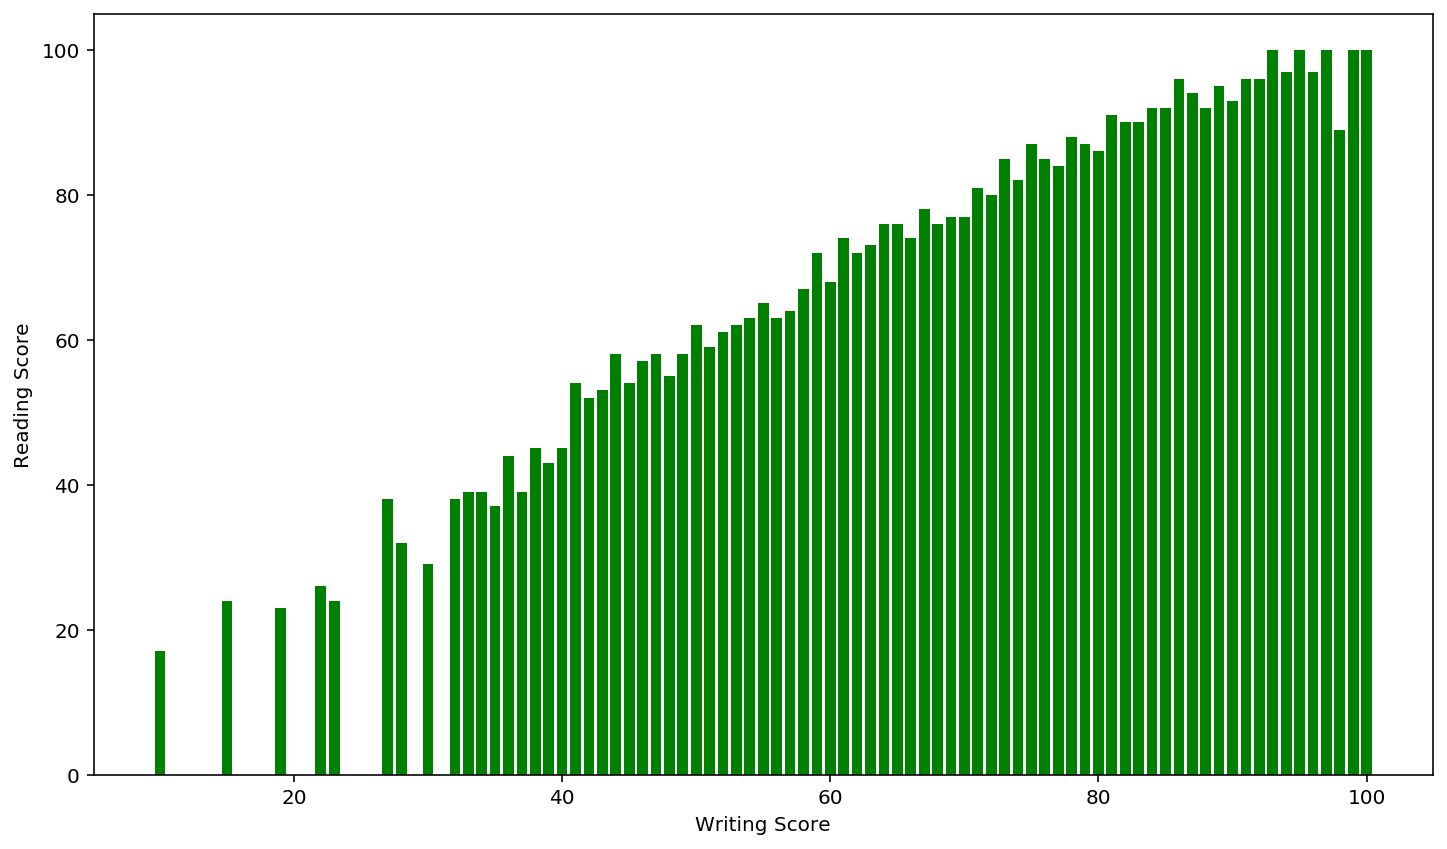

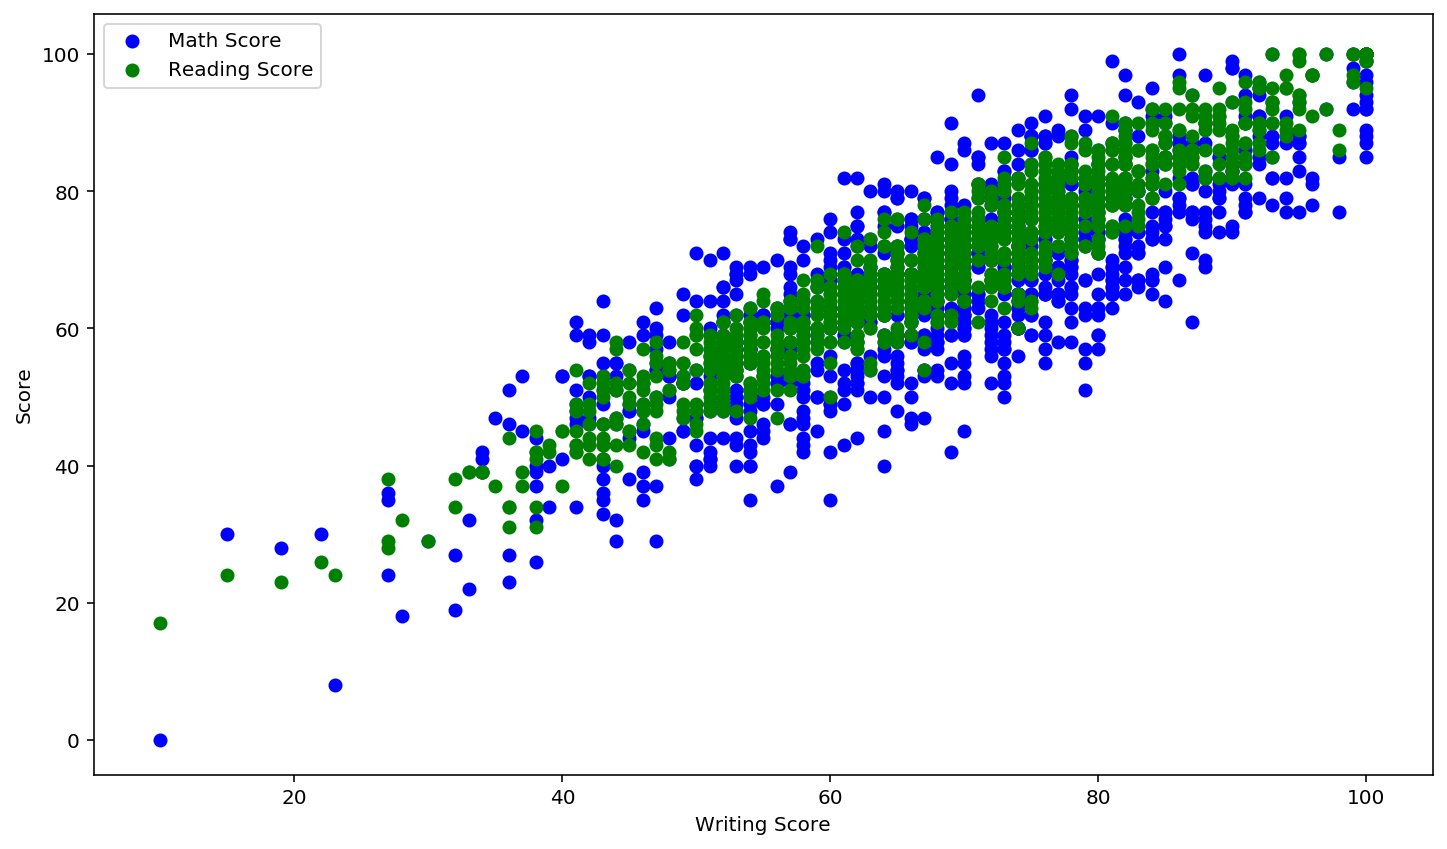

In [50]:
# reading scores vs writing scores

# bar graph
plt.bar(students_df['writing score'], students_df['reading score'], color='green')
plt.xlabel("Writing Score")
plt.ylabel("Reading Score")
plt.show()

# scatter plot
plt.scatter(students_df['writing score'], students_df['math score'], color='blue', label='Math Score')
plt.scatter(students_df['writing score'], students_df['reading score'], color='green', label='Reading Score')
plt.legend()
plt.xlabel("Writing Score")
plt.ylabel("Score")
plt.show()

In [28]:
# parents college background vs test scores
students_df['score sum'] = students_df['math score'] + students_df['reading score'] + students_df['writing score']
students_df['score average'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score'])/3

In [29]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum,score average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [69]:
stu_gr = students_df.groupby(['parental level of education'])['score average'].mean().reset_index()
stugr_sorted = stu_gr.sort_values('score average')

In [71]:
stu_gr 

,parental level of education,score average
0,associate's degree,69.569069
1,bachelor's degree,71.923729
2,high school,63.096939
3,master's degree,73.598870
4,some college,68.476401
5,some high school,65.108007


In [72]:
stugr_sorted

,parental level of education,score average
2,high school,63.096939
5,some high school,65.108007
4,some college,68.476401
0,associate's degree,69.569069
1,bachelor's degree,71.923729
3,master's degree,73.598870


In [32]:
students_df['parental level of education'].nunique()

6

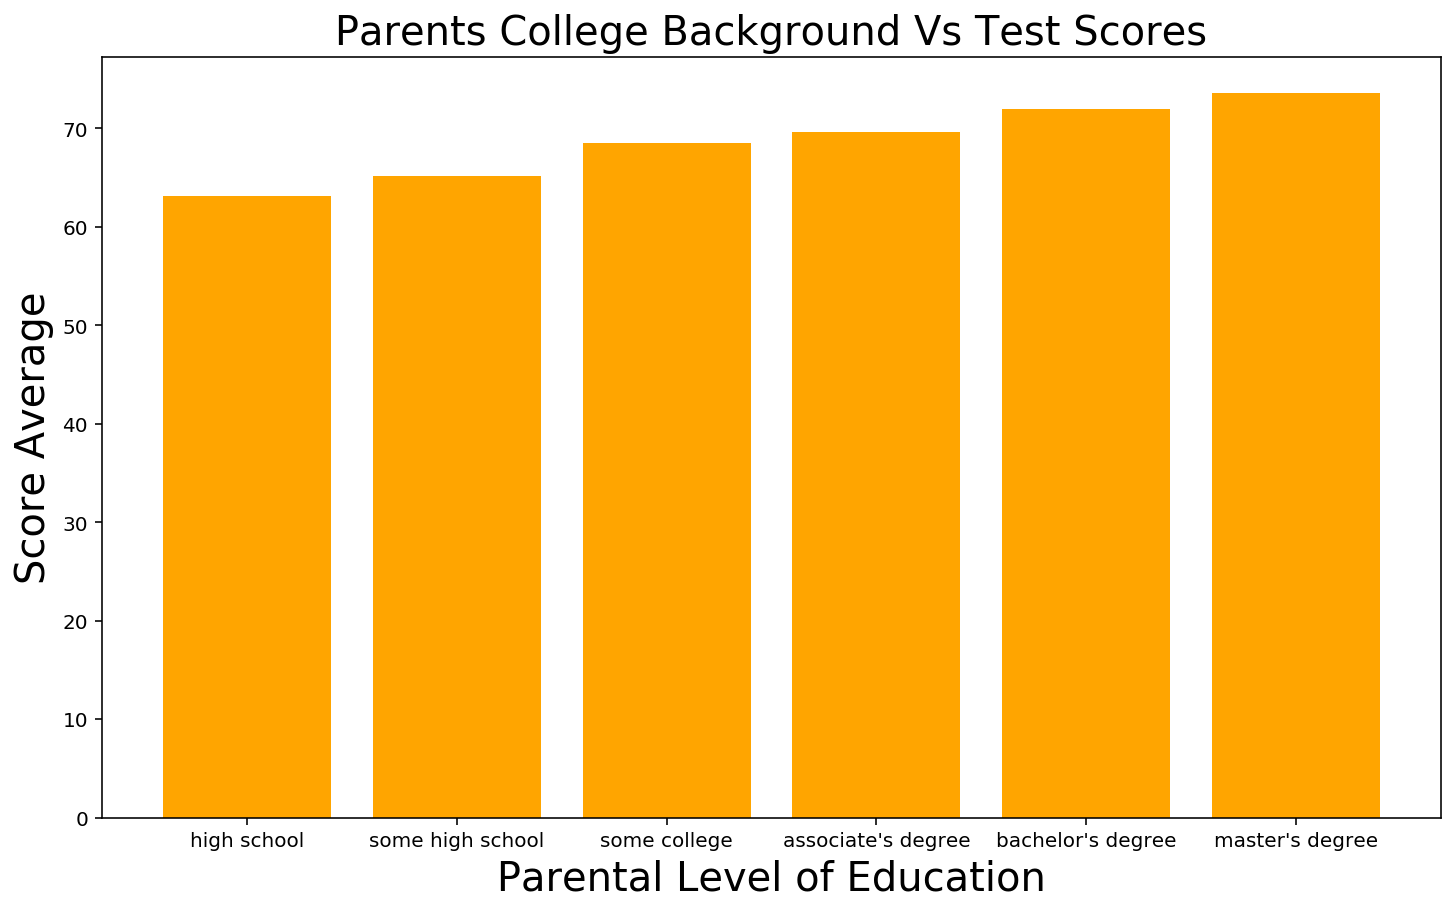

In [85]:
plt.bar(stugr_sorted['parental level of education'], stugr_sorted['score average'],color='orange')
plt.xlabel("Parental Level of Education", size = 20 )
plt.ylabel("Score Average", size = 20 )
plt.title("Parents College Background Vs Test Scores", size = 20)

plt.show()

In [34]:
# test preparation amount vs test scores
students_df['score average'] = (students_df['math score'] + students_df['reading score'] + students_df['writing score'])/3

In [35]:
preparation_df = students_df[students_df['test preparation course']=="none"]
preparation1_df = students_df[students_df['test preparation course']=="completed"]

In [0]:
students_df.groupby(['parental level of education'])['score average'].mean().reset_index()

In [36]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score sum,score average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [76]:
score_gr = preparation_df.groupby(['test preparation course', 'gender'])['score average'].mean().reset_index()
score1_gr = preparation1_df.groupby(['test preparation course', 'gender'])['score average'].mean().reset_index()

In [77]:
score_gr

,test preparation course,gender,score average
0,none,female,66.878244
1,none,male,63.044372


In [78]:
score1_gr

,test preparation course,gender,score average
0,completed,female,74.454710
1,completed,male,70.781609


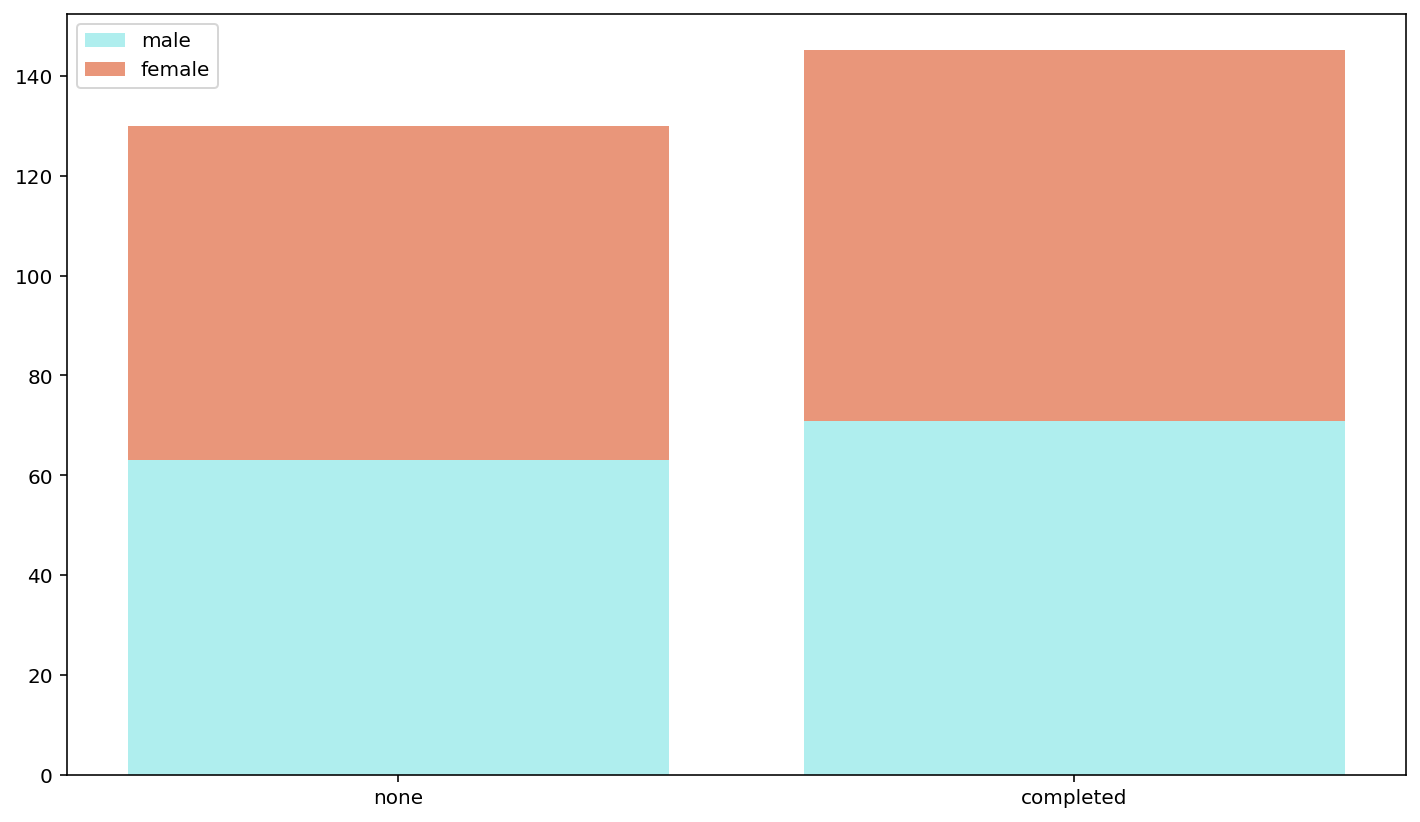

In [91]:
x = ['none', 'completed']
y1 = [63.044372, 70.781609]
y2 = [66.878244, 74.454710]

  
# plot bars in stack manner
plt.bar(x, y1, color='paleturquoise')
plt.bar(x, y2, bottom=y1, color='darksalmon')
plt.legend(["male", "female"])
plt.show()

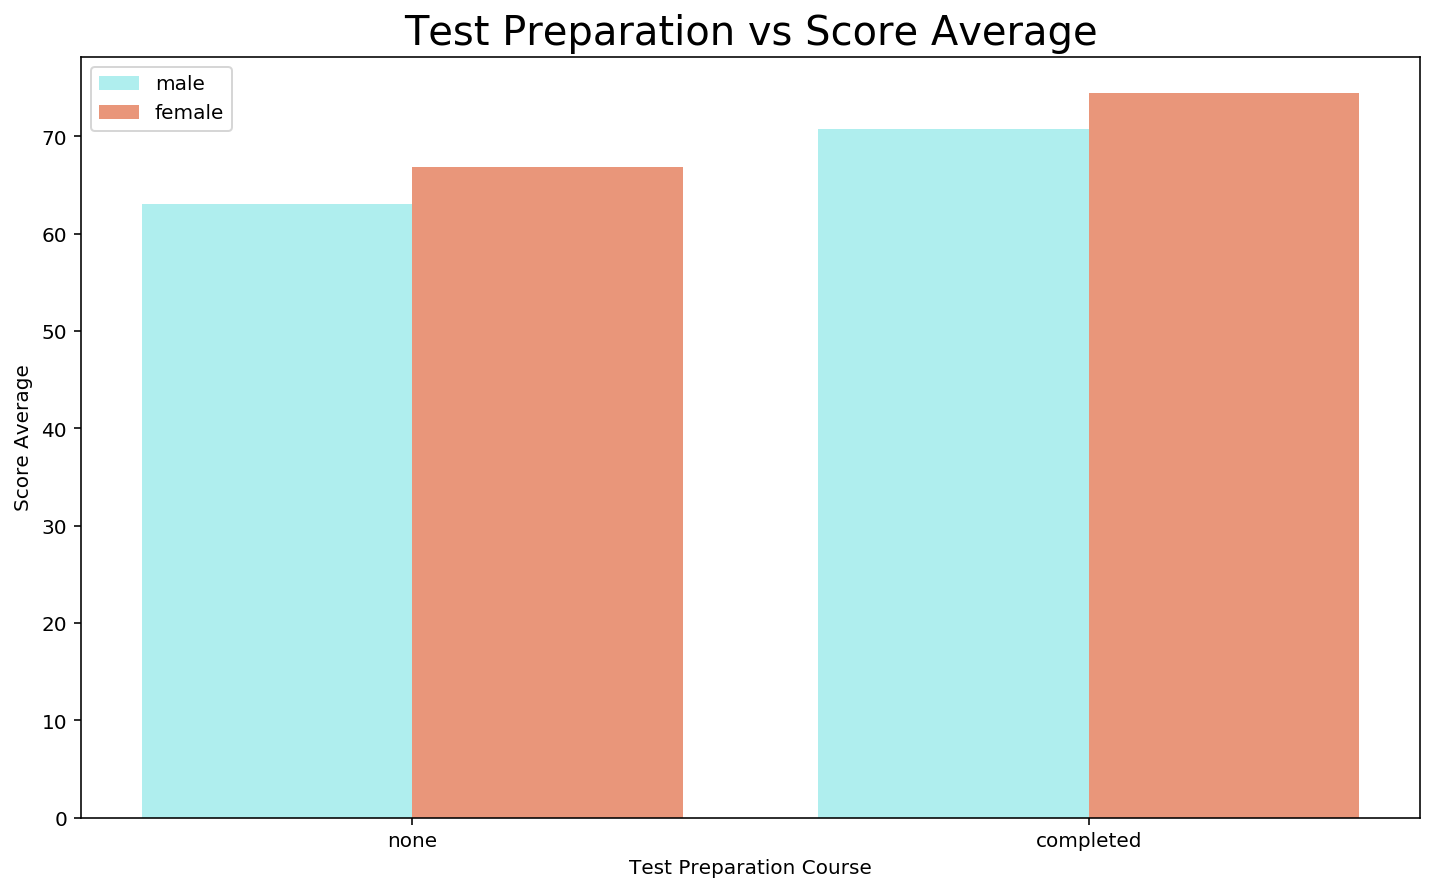

In [106]:
X = ['none', 'completed']
Ymale = [63.044372, 70.781609]
Zfemale = [66.878244, 74.454710]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ymale, 0.4, label = 'male', color='paleturquoise')
plt.bar(X_axis + 0.2, Zfemale, 0.4, label = 'female', color='darksalmon')
plt.xticks(X_axis, X)
plt.xlabel("Test Preparation Course")
plt.ylabel("Score Average")
plt.title("Test Preparation vs Score Average", size = 20)
plt.legend()
plt.show()